# St. Louis Cardinals Vs. Chicago Cubs
Historically there has been a great baseball rivaly between the Cardinals and the Cubs.  Python and Sqlite3 will be used to evaluate the history of the ball teams to determine which team is the best.  

In [40]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Created a percentage function to use in various parts of the project.
def percentage(number, total):
    return number/total


In the next cell I create a baseball database and read in the csv file that has the annual team data from 1871-2018.

In [42]:
con = sqlite3.connect('mlbbaseball.db')
mlb_df = pd.read_csv('../../../Desktop/Teams.csv', index_col=None, na_values=['NA'])

Next I add the team_table to my baseball database.

In [43]:
mlb_df.to_sql("team_table", con, if_exists = "replace")

When it comes to baseball the best team is always determined by who wins the **World Series**.  Since 1903 the top team from the American League and the National League have fought to be World Champions over a series of seven (used to be nine) games.  The most obvious way to determine which team is best is to figure out how many times each team has been the top in their league since 1903.       

In [44]:
# Add World Series data to database
ws_df = pd.read_csv('../../../Desktop/SeriesPost.csv', index_col=None, na_values=['NA'])
ws_df.to_sql("WorldSeries_table", con, if_exists = "replace")

In [106]:
# Query for World Sereies Wins by Team
sln_ws_df = pd.read_sql_query("SELECT count(yearID) AS WS_Wins, teamIDwinner AS team FROM WorldSeries_table WHERE round='WS' AND (teamIDwinner = 'SLN' OR teamIDwinner = 'SL4') ", con)
chn_ws_df = pd.read_sql_query("SELECT count(yearID) AS WS_Wins, teamIDwinner AS team FROM WorldSeries_table WHERE round='WS' AND teamIDwinner = 'CHN' ", con)


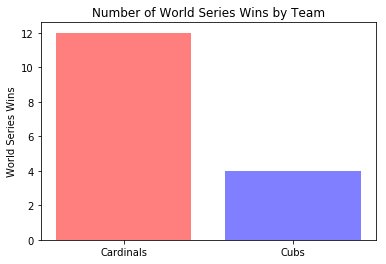

In [107]:
# Create a graph showing the total World Series Wins for each team
teams = ('Cardinals', 'Cubs')
y_pos = np.arange(len(teams))
ws_wins = [sln_ws_df.WS_Wins[0], chn_ws_df.WS_Wins[0]]
color = ('red', 'blue')

plt.bar(y_pos, ws_wins, align='center', alpha=0.5, color=color)
plt.xticks(y_pos, teams)
plt.ylabel('World Series Wins')
plt.title('Number of World Series Wins by Team')

plt.show()


This really is not a fair judge of the teams.  Any baseball fan knows about **The Curse of the Billy Goat**, a 71 year curse that prohibited the Cubs from winning a World Series.  A better way to judge the two teams to see who has the best record of wins over loss.  

In [47]:
# Query the total wins and losses for each team 
slnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE (teamID = 'SLN' OR teamID = 'SL4') ORDER BY teamID", con)
chnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE teamID = 'CHN' ORDER BY teamID", con)

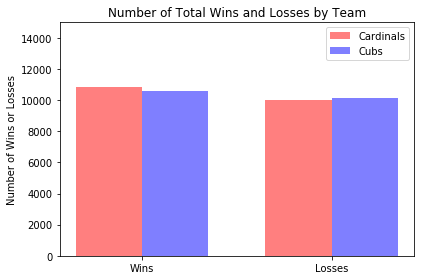

In [113]:
# Gather the data for the graphs from the query above
n_groups = 2
sln_winlos = (slnwinlos_df.total_wins[0], slnwinlos_df.total_loss[0])
chn_winlos = (chnwinlos_df.total_wins[0], chnwinlos_df.total_loss[0])

# Plot the wins and loses for each team
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sln_winlos, bar_width, alpha=0.5, color='red', label='Cardinals')
rects1 = plt.bar(index + bar_width, chn_winlos, bar_width, alpha=0.5, color='blue', label='Cubs')

plt.ylabel('Number of Wins or Losses')
plt.title('Number of Total Wins and Losses by Team')
plt.xticks(index + .5 * bar_width, ('Wins', 'Losses'))
plt.ylim(0, 15000)
plt.legend()

plt.tight_layout()
plt.show()

The Cubs team started playing ball in 1876 and the Cardinals team was started in 1882.  Given this 6 year difference the team wins and losses before 1882 need to be excluded from this query.  The St Louis team that started playing ball in 1882 was originally called the Brown Stockings.  The team information from the Brown Stockings will be included in the query.  In 1900 the team was renamed the Cardinals.  Nothing in the team was changed other than their name.  This is why the Brown Stocking information will be included in the query. 

In [110]:
# Modified my data from above with data only dating back to 1882
slnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4') ORDER BY teamID", con)
chnwinlos_df = pd.read_sql_query("SELECT teamID AS team, SUM(W) AS total_wins, SUM(L) AS total_loss FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ORDER BY teamID", con)


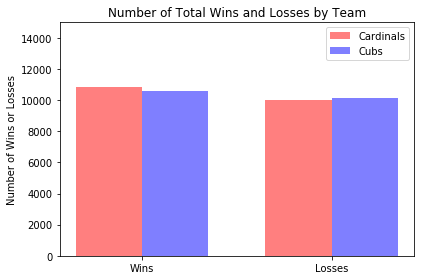

In [112]:
# Updating the data for the graph with data only dating back to 1882
sln_winlos = (slnwinlos_df.total_wins[0], slnwinlos_df.total_loss[0])
chn_winlos = (chnwinlos_df.total_wins[0], chnwinlos_df.total_loss[0])

# Plot the wins and losses for each team
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sln_winlos, bar_width, alpha=0.5, color='red', label='Cardinals')
rects1 = plt.bar(index + bar_width, chn_winlos, bar_width, alpha=0.5, color='blue', label='Cubs')

plt.ylabel('Number of Wins or Losses')
plt.title('Number of Total Wins and Losses by Team')
plt.xticks(index + .5 * bar_width, ('Wins', 'Losses'))
plt.ylim(0, 15000)
plt.legend()

plt.tight_layout()
plt.show()

After modifying the data collection to begin in 1882 the results change.  

In the graph above The Cardinals appear to be the superior team in that they have more wins and less losses than the Cubs.  Raw data is never the enire story.  Comparing the average wins and losses for each team changes the outcome.  

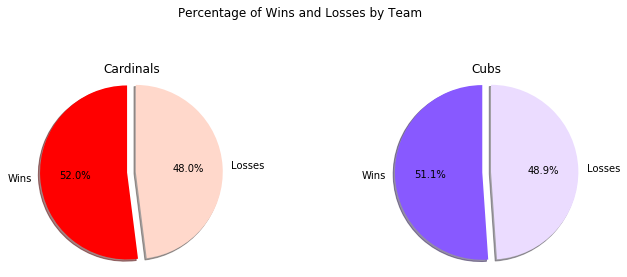

In [121]:
# Calculate total games played by each team since 1882
sln_total_games = slnwinlos_df.total_wins[0] + slnwinlos_df.total_loss[0]
chn_total_games = chnwinlos_df.total_wins[0] + chnwinlos_df.total_loss[0]

# Set variables for pie chart
labels = 'Wins', 'Losses'
sln_sizes = [percentage(slnwinlos_df.total_wins[0],sln_total_games), percentage(slnwinlos_df.total_loss[0],sln_total_games)]
chn_sizes = [percentage(chnwinlos_df.total_wins[0],chn_total_games), percentage(chnwinlos_df.total_loss[0],chn_total_games)]
explode = (0.1, 0)
sln_color = ('#ff0000', '#ffd8cb')
chn_color = ('#8859ff', '#ebdcff')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

fig.suptitle('Percentage of Wins and Losses by Team')

plt.subplots_adjust(hspace = 0.9, wspace=0.75)

ax1.pie(sln_sizes, explode=explode, labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=sln_color)
ax1.set_title("Cardinals")
ax1.axis('equal') 

ax2.pie(chn_sizes, explode=explode, labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=chn_color)
ax2.set_title("Cubs")
ax2.axis('equal') 

plt.show()

In [115]:
# Query pitchers stats for each team
sln_pitches_df = pd.read_sql_query("SELECT teamID AS team, avg(ERA) AS era, SUM(BBA) AS total_walks, SUM(SOA) AS total_strikeout FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4')", con)
chn_pitches_df = pd.read_sql_query("SELECT teamID AS team, avg(ERA) AS era, SUM(BBA) AS total_walks, SUM(SOA) AS total_strikeout FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ", con)


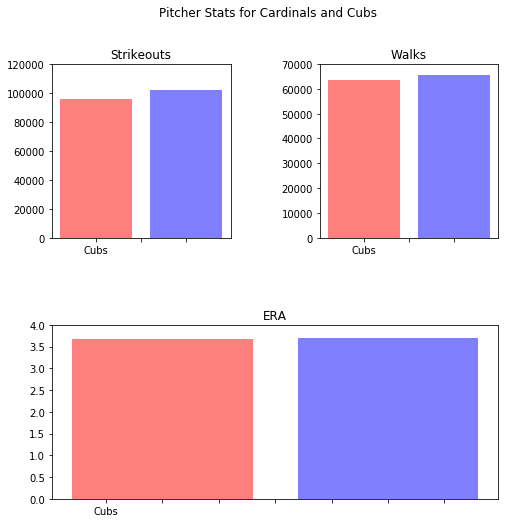

In [120]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Pitcher Stats for Cardinals and Cubs')

ax3.bar(y_pos, [sln_pitches_df.era[0], chn_pitches_df.era[0]], align='center', alpha=0.5, color=color)
ax3.set_ylim(0, 4.0)
ax3.set_xticklabels(teams)
ax3.set_title('ERA')

ax2.bar(y_pos, [sln_pitches_df.total_walks[0], chn_pitches_df.total_walks[0]], align='center', alpha=0.5, color=color)
ax2.set_ylim(0, 70000)
ax2.set_xticklabels(teams)
ax2.set_title('Walks')

ax1.bar(y_pos, [sln_pitches_df.total_strikeout[0], chn_pitches_df.total_strikeout[0]], align='center', alpha=0.5, color=color)
ax1.set_ylim(0, 120000)
ax1.set_xticklabels(teams)
ax1.set_title('Strikeouts')

plt.show()

When looking at the raw data ERA, total number of walks and total number of strikeouts are very similar, however the Cubs pitchers may have a few more strikeouts than the Cardinal pitchers, and the Cardinal pitchers may have a few less walks than the Cubs pitchers.

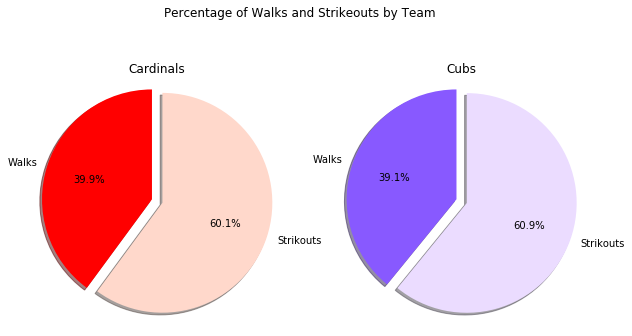

<Figure size 2160x1440 with 0 Axes>

In [118]:
# Getting the total number of pitches walks + strikeouts for each team
sln_total_pitches = sln_pitches_df.total_walks[0] + sln_pitches_df.total_strikeout[0]
chn_total_pitches = chn_pitches_df.total_walks[0] + chn_pitches_df.total_strikeout[0]

# Create new variables for figures
pitch_label = 'Walks', 'Strikouts'

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

fig.suptitle('Percentage of Walks and Strikeouts by Team')

plt.figure(figsize = (30,20))
plt.subplots_adjust(hspace = 0.9, wspace=0.75)

ax1.pie([percentage(sln_pitches_df.total_walks[0], sln_total_pitches), percentage(sln_pitches_df.total_strikeout[0], sln_total_pitches)], explode=explode, labels = pitch_label, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=sln_color)
ax1.set_title("Cardinals")
ax1.axis('equal') 

ax2.pie([percentage(chn_pitches_df.total_walks[0], chn_total_pitches), percentage(chn_pitches_df.total_strikeout[0], chn_total_pitches)], explode=explode, labels = pitch_label, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=chn_color)
ax2.set_title("Cubs")
ax2.axis('equal') 

plt.show()

In the pie graphs above it is easy to see that the Cardinals and Cubs have pitched, on average, the same amount of walks and strikeouts in the history of their ball clubs. So far the only thing we have that really sets the two teams apart is the number of World Series wins.

Pitchers only stop the other team from scoring runs.  If your batters aren't getting hits your ball club 
will be no good regardless of the strength of your pitchers.

In [71]:
# Querry all at bats, hits, doubles, triples and home runs for each team since 1882
sln_hits_df = pd.read_sql_query("SELECT teamID AS team, SUM(AB) AS at_bat, SUM(H) AS hits, SUM('2B') AS double, SUM('3B') AS triple, SUM(HR) AS home_runs FROM team_table WHERE yearID > 1881 AND (teamID = 'SLN' OR teamID = 'SL4') ORDER BY yearID", con)
chn_hits_df = pd.read_sql_query("SELECT teamID AS team, SUM(AB) AS at_bat, SUM(H) AS hits, SUM('2B') AS double, SUM('3B') AS triple, SUM(HR) AS home_runs FROM team_table WHERE yearID > 1881 AND teamID = 'CHN' ORDER BY yearID", con)

# Calculate the total number of outs hit into by subtrating at bats from hits, doubles, triples and home runs
sln_outs = sln_hits_df.at_bat[0] - sln_hits_df.hits[0] - sln_hits_df.double[0] - sln_hits_df.triple[0] - sln_hits_df.home_runs[0]
chn_outs = chn_hits_df.at_bat[0] - chn_hits_df.hits[0] - chn_hits_df.double[0] - chn_hits_df.triple[0] - chn_hits_df.home_runs[0]

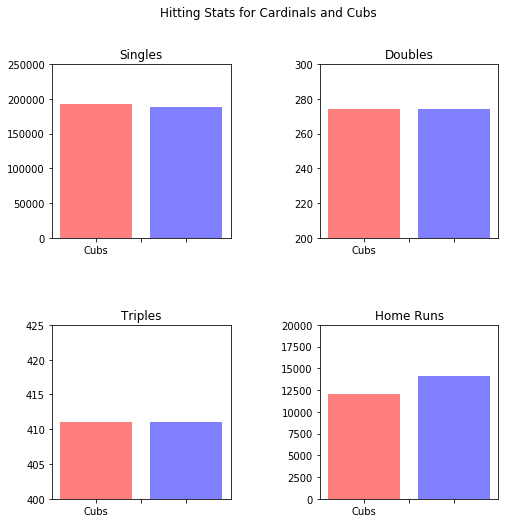

In [117]:
# Create graphs for the total number of singles, doubles, triples and homes runs hit by each ball club

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Hitting Stats for Cardinals and Cubs')

ax1.bar(y_pos, [sln_hits_df.hits[0], chn_hits_df.hits[0]], align='center', alpha=0.5, color=color)
ax1.set_ylim(0, 250000)
ax1.set_xticklabels(teams)
ax1.set_title('Singles')

ax2.bar(y_pos, [sln_hits_df.double[0], chn_hits_df.double[0]], align='center', alpha=0.5, color=color)
ax2.set_ylim(200, 300)
ax2.set_xticklabels(teams)
ax2.set_title('Doubles')

ax3.bar(y_pos, [sln_hits_df.triple[0], chn_hits_df.triple[0]], align='center', alpha=0.5, color=color)
ax3.set_ylim(400, 425)
ax3.set_xticklabels(teams)
ax3.set_title('Triples')

ax4.bar(y_pos, [sln_hits_df.home_runs[0], chn_hits_df.home_runs[0]], align='center', alpha=0.5, color=color)
ax4.set_ylim(0, 20000)
ax4.set_xticklabels(teams)
ax4.set_title('Home Runs')

plt.show()

In the graphs above you can see the Cubs have more homeruns than the Cardinals.  Both teams have exactly the same number of doubles and triples.  It is unclear if this is a mistake in the data or if it is coinsidence.  The data was tested and the same does not hold true for other ball teams.  

As you can see in the table below there is very little difference in the average number of singles, doubles, triples and home runs hit by each ball club.  

In [61]:
hits_data = {'singles': [percentage(sln_hits_df.hits[0], sln_hits_df.at_bat[0]), percentage(chn_hits_df.hits[0], chn_hits_df.at_bat[0])], 
             'doubles': [percentage(sln_hits_df.double[0], sln_hits_df.at_bat[0]), percentage(chn_hits_df.double[0], chn_hits_df.at_bat[0])], 
             'triples': [percentage(sln_hits_df.triple[0], sln_hits_df.at_bat[0]), percentage(chn_hits_df.triple[0], chn_hits_df.at_bat[0])], 
             'home_runs': [percentage(sln_hits_df.home_runs[0], sln_hits_df.at_bat[0]), percentage(chn_hits_df.home_runs[0], chn_hits_df.at_bat[0])]}
percent_hits_df = pd.DataFrame(data = hits_data)
percent_hits_df

,singles,doubles,triples,home_runs
0,0.266410,0.000381,0.000571,0.016800
1,0.262024,0.000383,0.000574,0.019684


In [ ]:
batting_df = pd.read_csv('../../../Desktop/Batting.csv', index_col=None, na_values=['NA'])
batting_df.to_sql("Batting_table", con, if_exists = "replace")

people_df = pd.read_csv('../../../Desktop/People.csv', index_col=None, na_values=['NA'])
people_df.to_sql("people_table", con, if_exists = "replace")

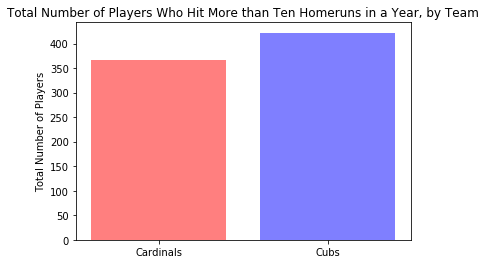

In [103]:
# I ariginally got the names of all the home run hitters per team, however I did not end up using this query.
batting_name_df = pd.read_sql_query("SELECT nameLast, nameFirst, HR, teamID FROM batting_table INNER JOIN people_table ON batting_table.playerID = people_table.playerID WHERE yearID > 1882 AND (teamID = 'SLN' OR teamID = 'SL4' OR teamID = 'CHN') AND HR > 50 ORDER BY teamID DESC", con)

sln_batting_hr_total_df = pd.read_sql_query("SELECT COUNT(teamID) AS hrTotal FROM batting_table WHERE yearID > 1882 AND (teamID = 'SLN' OR teamID = 'SL4') AND HR > 10", con)
chn_batting_hr_total_df = pd.read_sql_query("SELECT COUNT(teamID) AS hrTotal FROM batting_table WHERE yearID > 1882 AND (teamID = 'CHN') AND HR > 10", con)


plt.bar(y_pos, [sln_batting_hr_total_df.hrTotal[0], chn_batting_hr_total_df.hrTotal[0]], align='center', alpha=0.5, color=color)
plt.xticks(y_pos, teams)
plt.ylabel('Total Number of Players')
plt.title('Total Number of Players Who Hit More than Ten Homeruns in a Year, by Team')

plt.show()

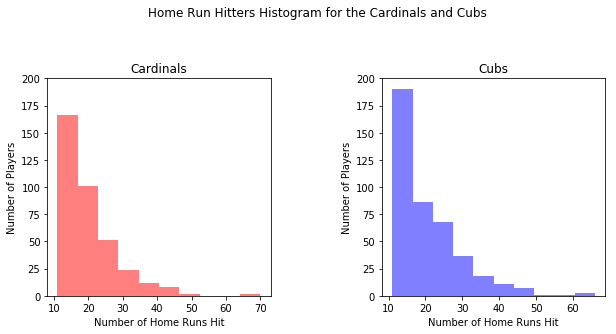

In [104]:
sln_hr_batting_df = pd.read_sql_query("SELECT teamID AS team, playerID, HR FROM batting_table WHERE yearID > 1882 AND (teamID = 'SLN' OR teamID = 'SL4')  AND HR > 10 ORDER BY HR DESC", con)
chn_hr_batting_df = pd.read_sql_query("SELECT teamID AS team, playerID, HR FROM batting_table WHERE yearID > 1882 AND teamID = 'CHN'  AND HR > 10 ORDER BY HR DESC", con)

fig= plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Home Run Hitters Histogram for the Cardinals and Cubs')

ax1.hist(sln_hr_batting_df.HR, color='red', alpha=0.5)
ax1.set_ylim(0, 200)
ax1.set_ylabel('Number of Players')
ax1.set_xlabel('Number of Home Runs Hit')
ax1.set_title("Cardinals")

ax2.hist(chn_hr_batting_df.HR, color='blue', alpha=0.5)
ax2.set_ylim(0, 200)
ax2.set_ylabel('Number of Players')
ax2.set_xlabel('Number of Home Runs Hit')
ax2.set_title("Cubs")

plt.show()

The histogram above shows the number of homeruns each homerun hitter actually hit per year for each team.  
For example, Mark McGwire for the Cardinals was the only batter to hit 70 homeruns. There were two batters, Hack Wilson, and Sammy Sosa who hit between 50-60 homeruns for the Cubs in one year.  

This graph shows that the Cubs have had more homerun hitters than the Cardinals, however the Cardinals did have one player that hit more homeruns than any Cubs player.  


In [ ]:
Over all the two ball clubs are actually evenly matched.  The only differences were the number of World Series wins and the 